In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Read data
parking_df = pd.read_csv('C:/projects/SANDAG/2017 On-Call Modeling Services/Area B/TO 05 - ABM3/data/Parking/mgra_parking_inventory.csv')
print(parking_df.head())

   mgra  on_street_free_spaces  on_street_paid_spaces  \
0     2                    0.0                   27.0   
1    12                   18.0                    3.0   
2    16                   52.0                    2.0   
3    25                   10.0                   24.0   
4    28                   20.0                   12.0   

   on_street_hourly_cost_during_business  \
0                                   1.25   
1                                   1.25   
2                                   1.25   
3                                   1.25   
4                                   1.25   

   on_street_hourly_cost_after_business  off_street_free_spaces  \
0                                  1.25                     0.0   
1                                  0.00                     0.0   
2                                  0.00                     0.0   
3                                  1.25                     0.0   
4                                  1.25                  

In [6]:
parking_df[['off_street_paid_public_hourly_cost_during_business','off_street_paid_public_daily_cost','off_street_paid_public_monthly_cost','off_street_paid_private_hourly_cost_during_business','off_street_paid_private_daily_cost','off_street_paid_private_monthly_cost']].describe()

,off_street_paid_public_hourly_cost_during_business,off_street_paid_public_daily_cost,off_street_paid_public_monthly_cost,off_street_paid_private_hourly_cost_during_business,off_street_paid_private_daily_cost,off_street_paid_private_monthly_cost
count,51.000000,32.000000,12.000000,187.000000,202.000000,57.000000
mean,2.759262,6.446890,91.191964,8.110603,21.133152,141.347556
std,0.978999,2.427483,10.210003,6.455746,11.423176,66.084282
min,0.500000,2.000000,68.303571,0.609185,3.000000,2.238806
25%,2.500000,5.375000,90.000000,3.000000,12.177831,96.693548
50%,3.000000,5.975000,93.000000,6.282723,18.550000,150.000000
75%,3.000000,7.000000,100.500000,10.074405,28.131146,190.000000
max,5.000000,15.000000,100.500000,40.000000,60.000000,260.000000


In [7]:
#Off-street public parking correlation
parking_df[['off_street_paid_public_hourly_cost_during_business','off_street_paid_public_daily_cost','off_street_paid_public_monthly_cost']].corr()


,off_street_paid_public_hourly_cost_during_business,off_street_paid_public_daily_cost,off_street_paid_public_monthly_cost
off_street_paid_public_hourly_cost_during_business,1.000000,-0.086482,-0.678125
off_street_paid_public_daily_cost,-0.086482,1.000000,-0.246331
off_street_paid_public_monthly_cost,-0.678125,-0.246331,1.000000


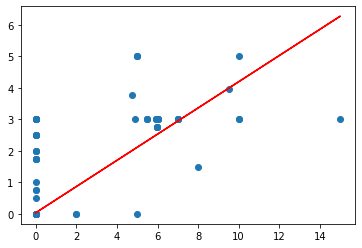

In [8]:
X = parking_df['off_street_paid_public_daily_cost'].fillna(0).values.reshape(-1, 1)
Y = parking_df['off_street_paid_public_hourly_cost_during_business'].fillna(0).values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
#parking_df.plot.scatter(y='off_street_paid_public_hourly_cost_during_business', x='off_street_paid_public_daily_cost', s = 100, c='black')

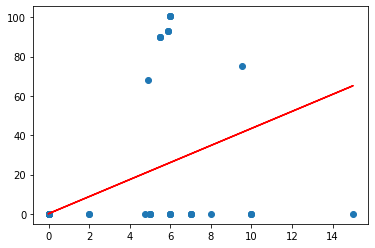

In [9]:
X = parking_df['off_street_paid_public_daily_cost'].fillna(0).values.reshape(-1, 1)
Y = parking_df['off_street_paid_public_monthly_cost'].fillna(0).values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
#parking_df.plot.scatter(y='off_street_paid_public_monthly_cost', x='off_street_paid_public_daily_cost', s = 100, c='black')

In [10]:
#Off-street private parking correlation
parking_df[['off_street_paid_private_hourly_cost_during_business','off_street_paid_private_daily_cost','off_street_paid_private_monthly_cost']].corr()


,off_street_paid_private_hourly_cost_during_business,off_street_paid_private_daily_cost,off_street_paid_private_monthly_cost
off_street_paid_private_hourly_cost_during_business,1.000000,0.396993,0.363518
off_street_paid_private_daily_cost,0.396993,1.000000,0.298213
off_street_paid_private_monthly_cost,0.363518,0.298213,1.000000


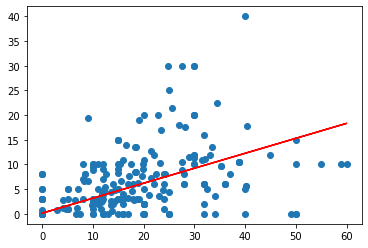

In [11]:
X = parking_df['off_street_paid_private_daily_cost'].fillna(0).values.reshape(-1, 1)
Y = parking_df['off_street_paid_private_hourly_cost_during_business'].fillna(0).values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
#parking_df.plot.scatter(y='off_street_paid_private_hourly_cost_during_business', x='off_street_paid_private_daily_cost', s = 100, c='black')

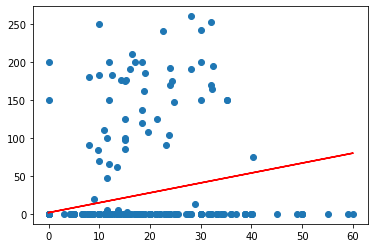

In [12]:
X = parking_df['off_street_paid_private_daily_cost'].fillna(0).values.reshape(-1, 1)
Y = parking_df['off_street_paid_private_monthly_cost'].fillna(0).values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
#parking_df.plot.scatter(y='off_street_paid_private_monthly_cost', x='off_street_paid_private_daily_cost', s = 100, c='black')

In [15]:
 #set max values for each off-street parking cost, since some public/private values are zero
parking_df['off_street_paid_monthly_cost'] = parking_df[['off_street_paid_private_monthly_cost','off_street_paid_public_monthly_cost']].max(axis=1)
parking_df['off_street_paid_daily_cost'] = parking_df[['off_street_paid_private_daily_cost','off_street_paid_public_daily_cost']].max(axis=1)
parking_df['off_street_paid_hourly_cost'] = parking_df[['off_street_paid_public_hourly_cost_during_business','off_street_paid_private_hourly_cost_during_business']].max(axis=1)